## **SALES PREDICTION USING RANDOM FOREST REGRESSOR**

OBJECTIVE:
To predict the Sales of items in a given Dataset using RandomForestRegressor  

DATA SOURCE:
https://github.com/YBI-Foundation/Dataset/raw/main/Big%20Sales%20Data.csv

Import Libraries

In [2]:
import pandas as pd
import numpy as np

Import Data

In [3]:
df = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Big%20Sales%20Data.csv")

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [5]:
df.info()
#Item_Weight has null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


Describe Data

In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11815.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.788355,0.065953,141.004977,1997.830681,2185.836320
std,4.654126,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,922.135101
50%,12.500000,0.054021,142.247000,1999.000000,1768.287680
75%,16.750000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


Data Preprocessing

In [12]:
df['Item_Weight'].fillna(df.groupby(['Item_Type'])['Item_Weight'].transform('mean'), inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [14]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [22]:
df.replace({'Item_Fat_Content': {'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'}}, inplace=True)

In [23]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [24]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [25]:
df.replace({'Item_Type': {'Fruits and Vegetables': 0, 'Snack Foods': 0, 'Household': 1, 'Frozen Foods': 0, 'Dairy': 0, 'Baking Goods': 0, 'Canned': 0, 'Health and Hygiene': 1, 'Meat': 0, 'Soft Drinks': 0, 'Breads': 0, 'Hard Drinks': 0, 'Others': 2, 'Starchy Foods': 0, 'Breakfast': 0, 'Seafood': 0}}, inplace=True)

In [26]:
df['Item_Type'].value_counts()

0    11518
1     2406
2      280
Name: Item_Type, dtype: int64

In [27]:
df['Outlet_Size'].value_counts()

Medium    7122
Small     5529
High      1553
Name: Outlet_Size, dtype: int64

In [29]:
df.replace({'Outlet_Size': {'Small': 0, 'Medium': 1, 'High': 2}}, inplace=True)

In [31]:
df['Outlet_Size'].value_counts()

1    7122
0    5529
2    1553
Name: Outlet_Size, dtype: int64

In [34]:
df['Outlet_Location_Type'].value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [35]:
df.replace({'Outlet_Location_Type': {'Tier 1': 0, 'Tier 2': 1, 'Tier 3': 2}}, inplace=True)

In [36]:
df['Outlet_Location_Type'].value_counts()

2    5583
1    4641
0    3980
Name: Outlet_Location_Type, dtype: int64

In [37]:
df['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [38]:
df.replace({'Outlet_Type': {'Grocery Store': 0, 'Supermarket Type1': 1, 'Supermarket Type2': 2, 'Supermarket Type3': 3}}, inplace=True)

In [39]:
df['Outlet_Type'].value_counts()

1    9294
0    1805
3    1559
2    1546
Name: Outlet_Type, dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  int64  
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  int64  
 9   Outlet_Location_Type       14204 non-null  int64  
 10  Outlet_Type                14204 non-null  int64  
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1.3+ MB


In [41]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [42]:
df.replace({'Item_Fat_Content': {'Low Fat': 0, 'Regular': 1}}, inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  int64  
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  int64  
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  int64  
 9   Outlet_Location_Type       14204 non-null  int64  
 10  Outlet_Type                14204 non-null  int64  
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(6), object(2)
memory usage: 1.3+ MB


In [51]:
df['Outlet_Identifier'].value_counts()

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [52]:
df.replace({'Outlet_Identifier': {'OUT027': 0, 'OUT013': 1, 'OUT049': 2, 'OUT046': 3, 'OUT035': 4, 'OUT045': 5, 'OUT018': 6, 'OUT017': 7, 'OUT010': 8, 'OUT019': 9}}, inplace=True)

Define target variable(y) and feature variables(x)

In [53]:
y = df['Item_Outlet_Sales']
x = df.drop(['Item_Identifier', 'Item_Outlet_Sales'], axis=1)

In [54]:
y.shape

(14204,)

In [55]:
x.shape

(14204, 10)

Train Test Split

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=2529)

Modelling

In [58]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=2529)

Model Training

In [59]:
model.fit(x_train, y_train)

RandomForestRegressor(random_state=2529)

Prediction

In [60]:
y_pred = model.predict(x_test)

Error Calculation

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [62]:
mean_absolute_error(y_test, y_pred)

823.7497339166895

In [63]:
mean_squared_error(y_test, y_pred)

1534287.163458893

In [64]:
r2_score(y_test, y_pred)

0.5402768666195472

Actual vs Prediicted values

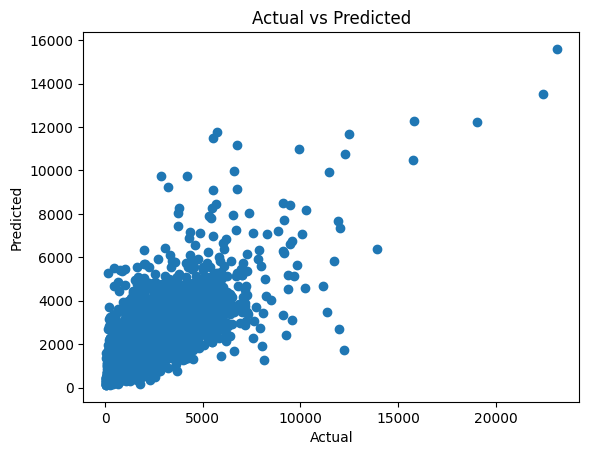

In [68]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()